$$u''(t)+ \mu u'(t)(u 2 (t)−1)+u(t)=0$$

El cambio de vvariable $u' = v$ lo convierte en un sistema de ecuaciones diferenciales de primero orden.

$$u' = v$$
$$v' = −u+ \mu v (1−u 2)$$

La solución empieza a partir de las condiciones iniciales $(u,v) = (1,0)$ en $t=0$ hasta $t=100$.

In [1]:
import numpy as np
from scipy.integrate import ode
import matplotlib.pyplot as plt

In [2]:
def f(t, y, mu):
    func = np.array([y[1], -y[0] + mu*y[1]*(1 - y[0]**2)])
    return func

In [3]:
def jac(t, y, mu):
    
    J = np.array([[0.,1.],
                 [-2.*mu*y[0]*y[1] - 1., -mu*(y[0]**2 - 1.)]])
    
    return J

In [4]:
y0 = np.array([1.,0.])
t0 = 0.

In [5]:
r = ode(f, jac).set_integrator('dop853', method='bdf')
r.set_initial_value(y0, t0).set_f_params(10.0).set_jac_params(10.0)
t1 = 100.
dt = 0.01

nt = t1/dt -1

In [6]:
sol = []
while r.successful() and r.t < t1:
    sol.append(r.integrate(r.t+dt))
    
solnp = np.array(sol)

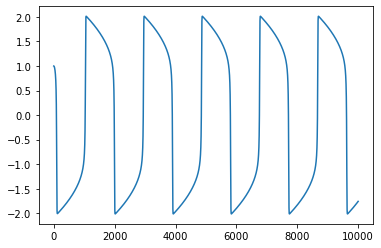

In [7]:
plt.plot(solnp[:,0])